**SM339 &#x25aa; Applied Statistics &#x25aa; Spring 2024 &#x25aa; Uhan**

# Lesson 19. Coding Categorical Predictors

## Overview

* We have seen how to include categorical predictor variables when there are only two categories

* Now we'll see what to do when there are _more than two categories_

### Example 1

Let's look at the data in `ThreeCars` from the `Stat2Data` library, which contains information on 90 randomly selected used cars. In particular, we will consider $\mathit{CarType}$ (Porsche, Jaguar, or BMW), $\mathit{Price}$ (in \\$1000s), and $\mathit{Mileage}$ (in 1000s of miles).
We want to predict a car's price based on its mileage and type.

In [1]:
library(Stat2Data)
data(ThreeCars)
head(ThreeCars)

,CarType,Price,Age,Mileage,Car,Porsche,Jaguar,BMW
,<fct>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,Porsche,69.4,3,21.5,0,1,0,0
2,Porsche,56.9,3,43.0,0,1,0,0
3,Porsche,49.9,2,19.9,0,1,0,0
4,Porsche,47.4,4,36.0,0,1,0,0
5,Porsche,42.9,4,44.0,0,1,0,0
6,Porsche,36.9,6,49.8,0,1,0,0


Let's start by creating a scatterplot, with the points color coded according to $\mathit{CarType}$:

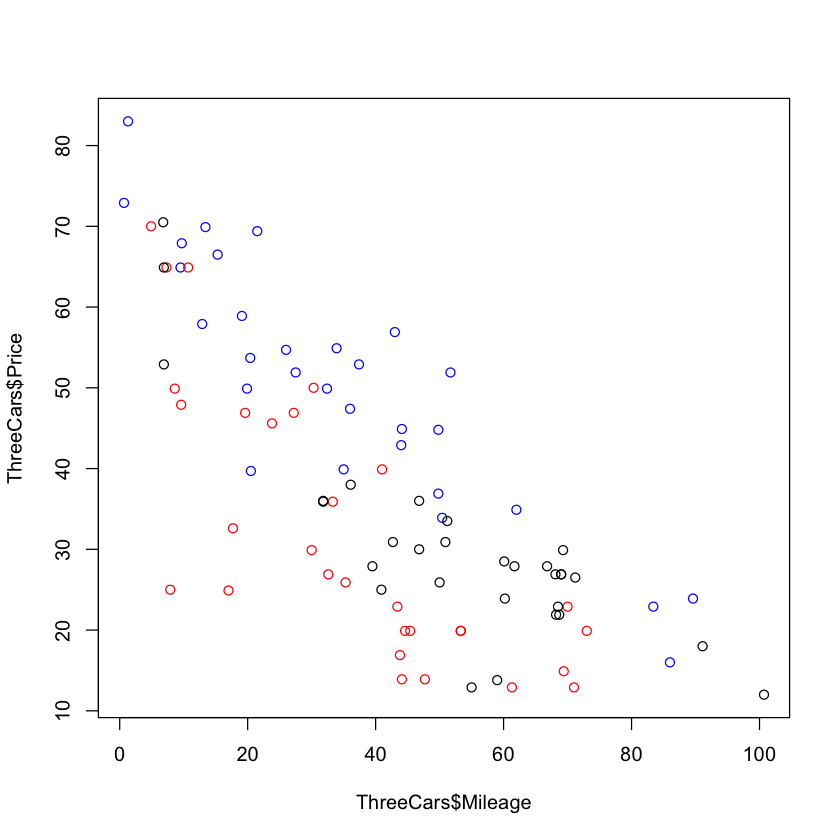

In [2]:
colors <- ifelse(ThreeCars$CarType == "BMW", "black",
                 ifelse(ThreeCars$CarType == "Porsche", "blue", "red"))

plot(ThreeCars$Mileage, ThreeCars$Price, col=colors)

Looking at the data and the scatterplot, can we answer the following questions:

- Are car type and mileage useful predictors of price?

- What is the predicted price of a car with given characteristics?

- For a fixed mileage, does the price of a car differ by car type (on average)?

- After accounting for car type, how is a car's mileage related to its price?

## How to include the categorical predictor

- To include a categorical variable with more than two categories: 
    - We will select one group to be the __reference__ category
    
    - We will include an indicator variable for _each other_ category
    
- So, if we have $k$ categories, we will have $k - 1$ indicator variables

<div class="alert alert-warning">
    <strong>Note.</strong>
    <ul>
    <li>It's important to NOT code the categorical variable as one predictor with categories designated by numerical values (e.g., $X$ taking values 0, 1, and 2).</li><br>
    <li>This would force the group intercepts to be equally spaced (not what we're going for) and would yield different intercept estimates if group labels were rearranged</li><br>
    <li>See Section 4.5 in STAT2 for a cautionary demonstration of this incorrect approach</li>
    </ul>
</div>

## Model allowing different intercepts for each group

### Example 1 cont.

* For $\mathit{CarType}$, let BMW be the reference category

* Then, we define indicator variables for Jaguar and Porsche:

$$ \mathit{Jaguar} = \begin{cases}
    1 & \text{if $\mathit{CarType}$ = Jaguar}\\
    0 & \text{otherwise}
    \end{cases} \qquad
    \mathit{Porsche} = \begin{cases}
    1 & \text{if $\mathit{CarType}$ = Porsche}\\
    0 & \text{otherwise}
    \end{cases} $$
   

#### Choose the model

* Our model:

$$ \mathit{Price} = \beta_0 + \beta_1 \mathit{Mileage} + \beta_2 \mathit{Jaguar} + \beta_3 \mathit{Porsche} + \varepsilon \qquad \text{where } \varepsilon \sim N(0, \sigma_{\varepsilon}^2) $$

* For BMWs, $\mathit{Jaguar} = 0$ and $\mathit{Porsche} = 0$, so our model reduces to

$$ \mathit{Price} = \beta_0 + \beta_1 \mathit{Mileage} + \varepsilon \qquad \text{where } \varepsilon \sim N(0, \sigma_{\varepsilon}^2) $$

* For Jaguars, $\mathit{Jaguar} = 1$ and $\mathit{Porsche} = 0$, so our model reduces to

$$ \mathit{Price} = (\beta_0 + \beta_2) + \beta_1 \mathit{Mileage} + \varepsilon \qquad \text{where } \varepsilon \sim N(0, \sigma_{\varepsilon}^2) $$

* For Porsches, $\mathit{Jaguar} = 0$ and $\mathit{Porsche} = 1$, so our model reduces to

$$ \mathit{Price} = (\beta_0 + \beta_3) + \beta_1 \mathit{Mileage} + \varepsilon \qquad \text{where } \varepsilon \sim N(0, \sigma_{\varepsilon}^2) $$

* To summarize, the coefficients:
    * $\beta_0 = $ the intercept for BMWs
    * $\beta_1 = $ the slope of mileage (for all groups/car types)
    * $\beta_2 = $ the change in intercept from BMWs to Jaguars
    * $\beta_3 = $ the change in intercept from BMWs to Porsches

#### Fit the model

* To fit our model, we use `as.factor()` to automatically create the indicator variables: 

In [3]:
fit <- lm(Price ~ Mileage + as.factor(CarType), data = ThreeCars)
summary(fit)


Call:
lm(formula = Price ~ Mileage + as.factor(CarType), data = ThreeCars)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.787  -5.361  -0.092   5.543  20.518 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               60.30070    2.71824  22.184  < 2e-16 ***
Mileage                   -0.56528    0.04166 -13.570  < 2e-16 ***
as.factor(CarType)Jaguar  -8.04851    2.34038  -3.439 0.000903 ***
as.factor(CarType)Porsche  9.94868    2.35395   4.226 5.89e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.625 on 86 degrees of freedom
Multiple R-squared:  0.7691,	Adjusted R-squared:  0.761 
F-statistic: 95.46 on 3 and 86 DF,  p-value: < 2.2e-16


* The fitted model is

$$ \widehat{Price} = 60.301 - 0.565 \mathit{Mileage} - 8.049 \mathit{Jaguar} + 9.949 \mathit{Porsche} $$ 

#### Assess the model

* We can use the diagnostic plots to check the linear regression conditions:

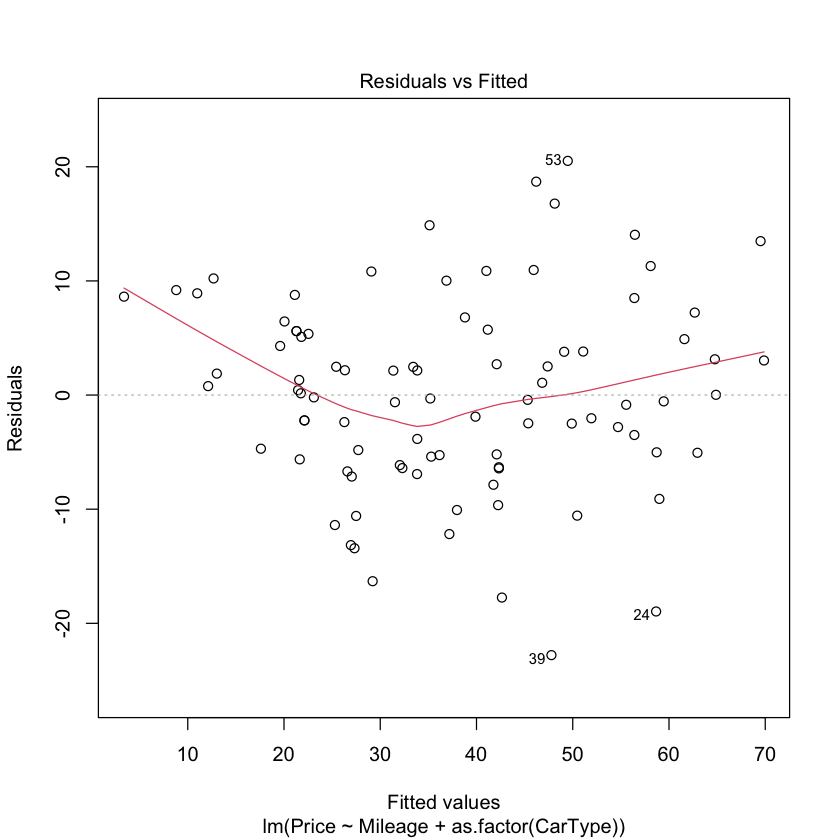

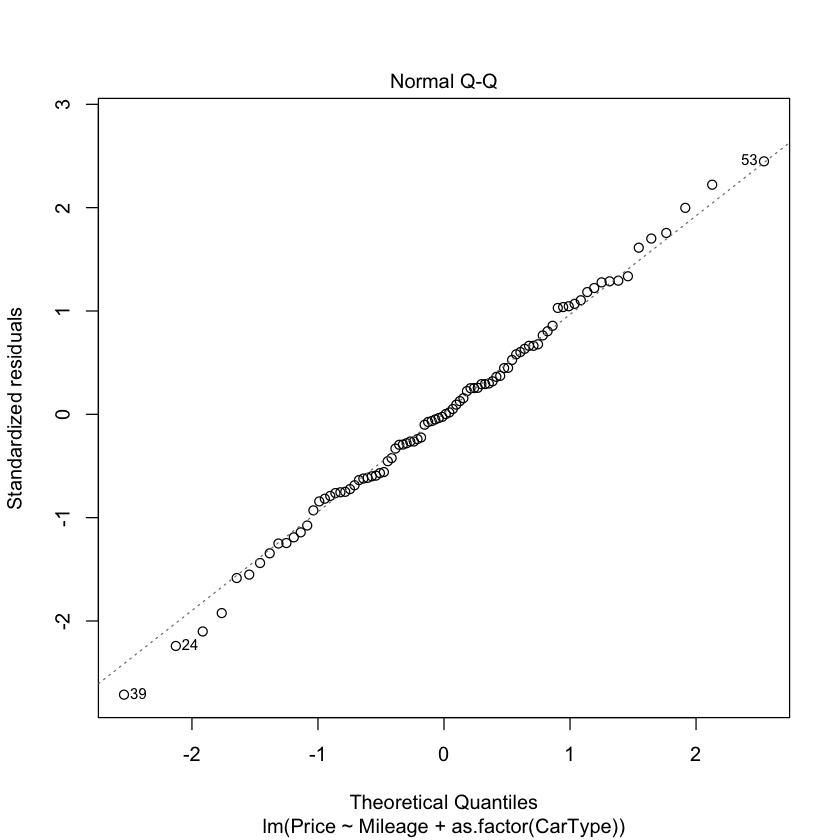

In [4]:
plot(fit, which = 1)
plot(fit, which = 2)

* Linearity is arguably not met, since the residuals vs. fitted values plot exhibits some curvature.

* Constant variance is also arguably not met, since the residuals vs. fitted values plot exhibits a fan shape (vertical span narrower on the left than on the right).

* Normality appears to be met, since the Normal Q-Q plot is an approximately straight line


* It turns out that we can improve the model (better satisfy the conditions) by adjusting how we include the quantitative predictor $\mathit{Mileage}$
    - See Lesson 18 for details


#### Use the model

* We can predict the price of a particular Jaguar with 30000 miles, and obtain the corresponding 90% prediction interval: 

In [5]:
predict(fit, newdata=data.frame(Mileage = 30, CarType = "Jaguar"), 
        interval="prediction", level=0.90)

,fit,lwr,upr
1,35.29372,20.7104,49.87703


* We can carefully interpret the coefficient of the Porsche indicator variable:

    > For a fixed mileage, we estimate Porsches cost \$9,948.68 more than BMWs on average.
    
* For a fixed car type, we can describe the estimated relationship between mileage and price:

    > For a given car type, an increase of 1000 miles is associated with an average decrease of \\$565.28 in price.

* Note that the coefficient on $\mathit{Mileage}$ is statistically significant, because the $p$-value for the $t$-test on $\beta_1$ is less than $2.2 \times 10^{-16}$

## Model allowing different intercepts AND slopes for each group 

* The model that would allow for different intercepts AND different slopes in Example 1 is

$$ \mathit{Price} = \beta_0 + \beta_1 \mathit{Mileage} + \beta_2 \mathit{Jaguar} + \beta_3 \mathit{Porsche} + \beta_4 (\mathit{Mileage} \times \mathit{Jaguar}) + \beta_5 (\mathit{Mileage} \times \mathit{Porsche}) + \varepsilon $$

* We can fit this model in R like this:

In [6]:
fit <- lm(Price ~ Mileage + CarType + Mileage:CarType, data = ThreeCars)
summary(fit)


Call:
lm(formula = Price ~ Mileage + CarType + Mileage:CarType, data = ThreeCars)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.3271  -4.8317  -0.2852   4.4235  18.8120 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            56.29007    4.15512  13.547  < 2e-16 ***
Mileage                -0.48988    0.07227  -6.778 1.58e-09 ***
CarTypeJaguar          -2.06261    5.23575  -0.394  0.69462    
CarTypePorsche         14.80038    5.04149   2.936  0.00429 ** 
Mileage:CarTypeJaguar  -0.13042    0.10567  -1.234  0.22057    
Mileage:CarTypePorsche -0.09952    0.09940  -1.001  0.31962    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.638 on 84 degrees of freedom
Multiple R-squared:  0.7737,	Adjusted R-squared:  0.7602 
F-statistic: 57.43 on 5 and 84 DF,  p-value: < 2.2e-16
